# Drift Example

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from impact import Impact, template_dir
from impact.particles import convert_particles_t_to_s, write_bmad_particles_ascii

In [3]:
ifile = os.path.join(template_dir, 'drift/ImpactT.in')
os.path.exists(ifile)

True

In [4]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 100e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


195.69256334448912

In [5]:
I = Impact(ifile)
I.input['header']['Np'] = 10000
I.input['header']['Nx'] = 32
I.input['header']['Ny'] = 32
I.input['header']['Nz'] = 32
I.input['header']['Dt'] = 100e-12

IX: 30
================ Impact-T Summary ================
1 bunchtotal charge: 1.0 pC
Distribution type: gauss3
Free space start
Tracking 10000 particles
Processor domain: 1 x 1 = 1 CPUs
Computational domain: 0.015 m x 0.015 m x 45.0 m
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Random Seed: 6
Reference Frequency: 2856000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning


Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp9ej1ga6v


In [6]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp9ej1ga6v
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
           0  0.24496010579045746     
 pass generating initial distribution...
 tstop:    1.0000000000000000     
 i,t,<z>:            1   0.0000000000000000        0.0000000000000000     
 zmin,zmax:    1.4551072791467532E-002   1.5365760508005253E-002
 i,t,<z>:            2   1.0000000000000000E-010   1.4988511070550100E-002
 zmin,zmax:    4.4529927179988466E-002   4.5344614896526983E-002
 time:    0.0000000000000000, elapsed: 1.3248348236083984Finished.
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort

In [7]:
I.output['stats'].keys()

dict_keys(['t', 'z', 'x_moment4', 'GBx_moment4', 'y_moment4', 'GBy_moment4', 'z_moment4', 'GBz_moment4', 'y_centroid', 'y_rms', 'GBy_centroid', 'GBy_rms', 'y_twiss', 'y_normemit', 'x_centroid', 'x_rms', 'GBx_centroid', 'GBx_rms', 'x_twiss', 'x_normemit', 'z_centroid', 'z_rms', 'GBz_centroid', 'GBz_rms', 'z_twiss', 'z_normemit', 'numparticles_min', 'numparticles_max', 'numparticles', 'x_moment3', 'GBx_moment3', 'y_moment3', 'GBy_moment3', 'z_moment3', 'GBz_moment3', 'gamma', 'E_kinetic', 'beta', 'r_max', 'deltaGamma_rms', 'x_max', 'GBx_max', 'y_max', 'GBy_max', 'z_max', 'GBz_max'])

In [8]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']
np.std(PI['z'])

9.894188901167192e-05

In [9]:
np.std(PF['x'])

0.0010046283603847525

In [10]:
len(PF)

9999

In [11]:
bparticles = convert_particles_t_to_s(PI, np.mean(PI['z']) ) 
write_bmad_particles_ascii(bparticles, filename='/Users/chrisonian/Code/bmad_svn/tao/examples/space_charge/BEG.beam0')

Written: /Users/chrisonian/Code/bmad_svn/tao/examples/space_charge/BEG.beam0


In [12]:
I.input['lattice']

[{'description': 'name:drift_1',
  'original': '1.0 0 0 0 1.0 0.15 /!name:drift_1',
  'L': 1.0,
  'type': 'drift',
  'zedge': 1.0,
  'radius': 0.15,
  's': 2.0,
  'name': 'drift_1'},
 {'type': 'comment',
  'comment': '!!!0 0 0 -8 0 -1 0.5 / name:SC_OFF',
  'L': 0,
  'name': 'comment_1'},
 {'description': 'name:stop_1',
  'original': '0 0 0 -99 0 0.0 1 /!name:stop_1',
  'type': 'stop',
  's': 1.0,
  'name': 'stop_1'},
 {'type': 'comment', 'comment': '', 'L': 0, 'name': 'comment_2'}]

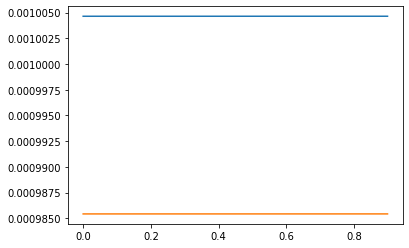

In [42]:
mec2 = 0.51099895000 # MeV

impact_energy = I.output['stats']['gamma']*mec2
impact_z    = I.output['stats']['z']
impact_sigma_x    = I.output['stats']['x_rms']
impact_sigma_y    = I.output['stats']['y_rms']
impact_sigma_z    = I.output['stats']['z_rms']
impact_normemit_x = I.output['stats']['x_normemit']
impact_normemit_y = I.output['stats']['y_normemit']
plt.plot(impact_z, impact_sigma_x)
plt.plot(impact_z, impact_sigma_y)
#plt.ylim(0,10)
#plt.plot(impact_z, 1e6*impact_normemit_x)
#plt.plot(impact_z, 1e6*impact_normemit_y)

In [43]:
p1 = convert_particles_t_to_s(PF, np.mean(PF['z']) ) 
p2 = np.loadtxt('/Users/chrisonian/Code/bmad_svn/tao/examples/space_charge/beam_1.dat', skiprows=9).T

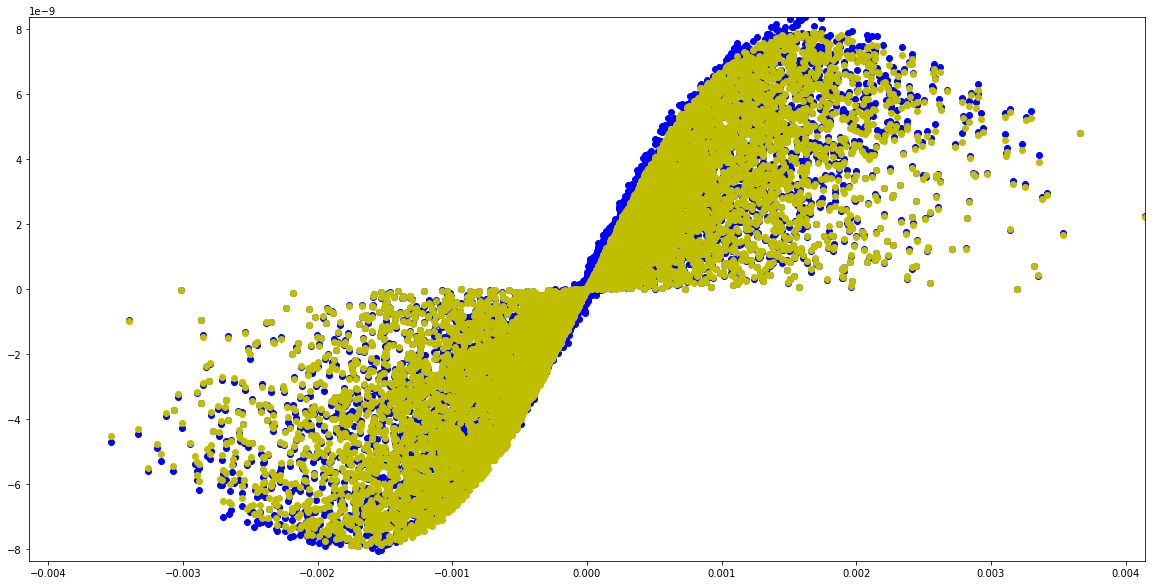

In [44]:
fig, ax = plt.subplots(figsize=(20,10))

a = np.max(p2[0])
b = np.max(p2[1])
plt.xlim(-a, a)
plt.ylim(-b, b)
ax.scatter(p2[0], p2[1], color='b')
ax.scatter(p1['x'], p1['px/p0'], color='y')


In [45]:
np.std(p1['x'])/np.std(p2[0])

1.0000000051876308

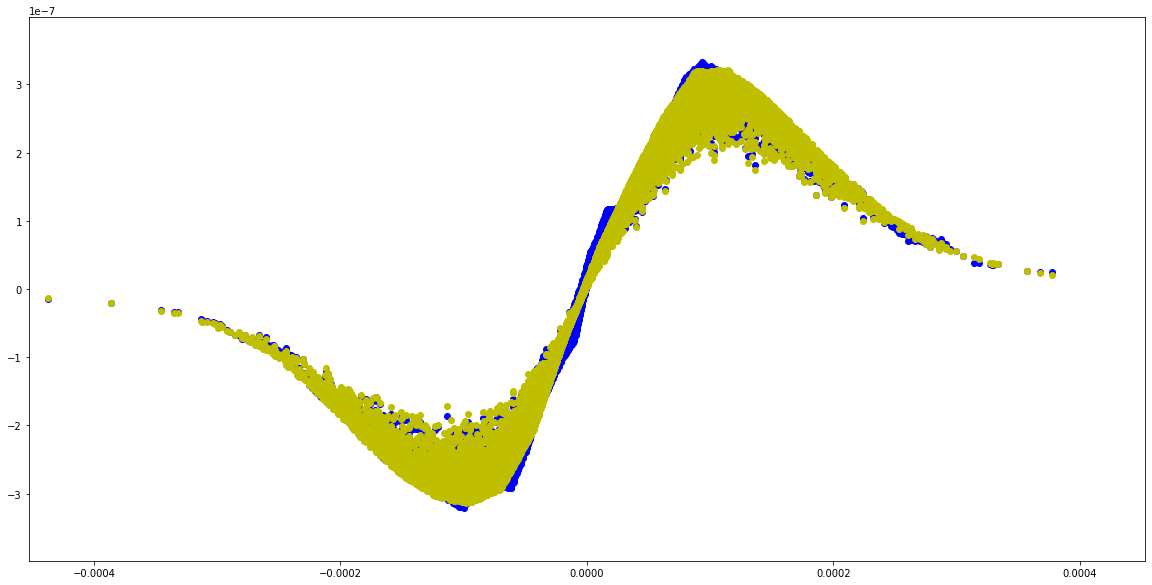

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

a = np.max(p2[4]*1.2)
b = np.max(p2[5]*1.2)
plt.xlim(-a, a)
plt.ylim(-b, b)

ax.scatter(p2[4], p2[5], color='b')
ax.scatter(p1['-betacdt'], p1['delta'], color='y')





In [47]:
delta_max1 = np.max(p1['delta'])
delta_max2 = np.max(p2[5])
delta_max1 * 100, delta_max2 * 100

(3.204822072166991e-05, 3.3188964954e-05)

In [48]:
Ex_analytic_max = 32.0007   * .001 # nC -> pC
Ez_analytic_max = 0.0326686 * .001 # nC -> pC
f'Ez max should be: {Ez_analytic_max} MeV, Ex max should be: {Ex_analytic_max/gamma**2} MeV'

'Ez max should be: 3.26686e-05 MeV, Ex max should be: 8.356020444784112e-07 MeV'

In [49]:
np.max(p1['px/p0'])

7.896459754565051e-09

In [50]:
np.max(p2[1])

8.3662802706e-09